In [25]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import plot_tree
from sklearn.metrics import classification_report,confusion_matrix

dataset = pd.read_csv(r'C:\Users\rosti\Downloads\breast+cancer+wisconsin+original\breast-cancer-wisconsin.data')
dataset.columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
clean_dataset = dataset.dropna()

for x in clean_dataset.index:
    if clean_dataset.loc[x, 'Bare Nuclei']=='?':
        clean_dataset.drop(x, inplace = True)

clean_dataset = clean_dataset.astype({'Bare Nuclei':'int64', 'Sample code number':'category'})

clean_dataset = clean_dataset.drop(['Sample code number'], axis = 1)

X = clean_dataset.drop(['Class'], axis = 1)
y = clean_dataset['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

clf = RandomForestClassifier(n_estimators=100) # класифікатор випадкового лісу
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           2       0.98      1.00      0.99        83
           4       1.00      0.96      0.98        54

    accuracy                           0.99       137
   macro avg       0.99      0.98      0.98       137
weighted avg       0.99      0.99      0.99       137



In [26]:
print(confusion_matrix(y_test, predictions))

[[83  0]
 [ 2 52]]


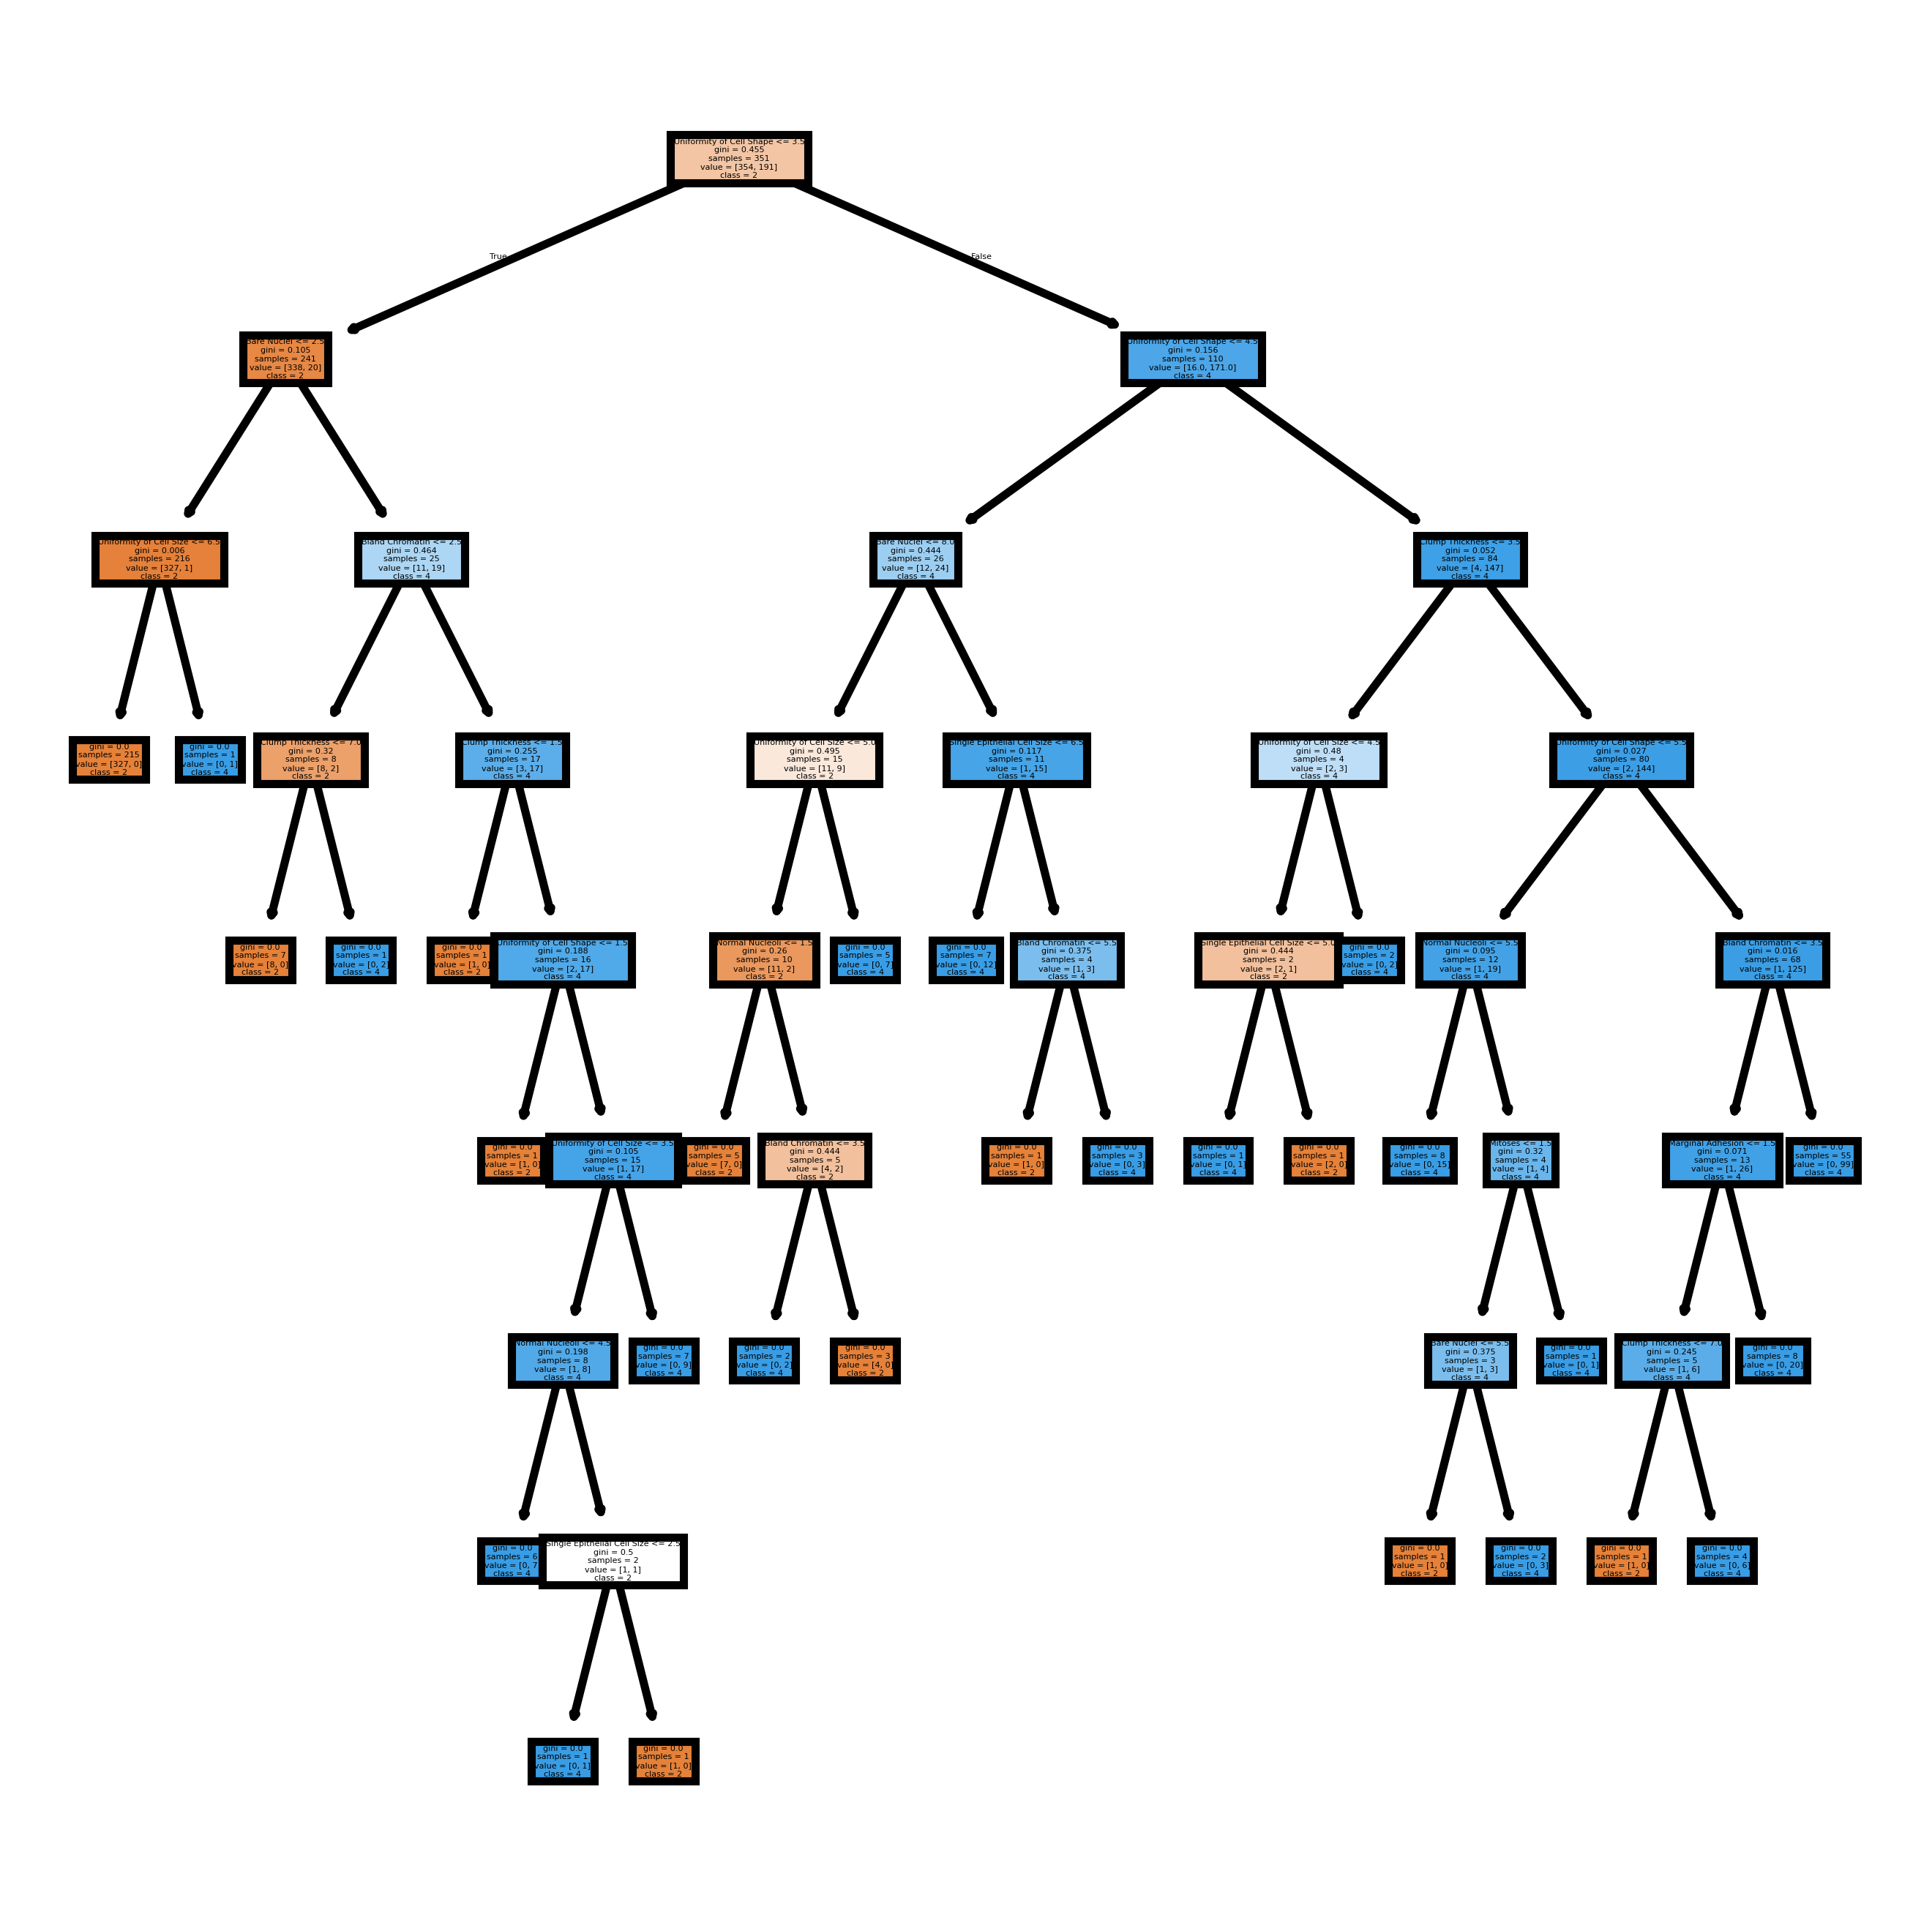

In [27]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
plot_tree(clf.estimators_[0], feature_names = ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses'], class_names=['2','4'], filled = True)
fig.savefig('clf_individualtree.png') #зображення моделі випадкового лісу